In [361]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [362]:
import numpy as np

from consumption_saving import *

In [363]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [364]:
value_function_employment(model.par, model.sol)

In [365]:
model.sol.a_next_e[-1,0,:]

array([-1.        , -0.94736842, -0.89473684, -0.84210526, -0.78947368,
       -0.73684211, -0.68421053, -0.63157895, -0.57894737, -0.52631579,
       -0.47368421, -0.42105263, -0.36842105, -0.31578947, -0.26315789,
       -0.21052632, -0.15789474, -0.10526316, -0.05263158,  0.        ])

In [366]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-3.34715327, -3.07526652, -2.80327066, -2.53333527, -2.26841053,
       -2.01248106, -1.77090297, -1.58798522, -1.49352181, -1.42102879,
       -1.3790646 , -1.22764099, -1.08831959, -0.95685749, -0.83581749,
       -0.72444389, -0.61844109, -0.52084513, -0.43590306, -0.36958826,
       -0.33036755, -0.25164782, -0.17447912, -0.09980959, -0.02894651,
        0.03977093,  0.10510516,  0.16530542,  0.21786949,  0.259172  ,
        0.28386462,  0.28386462,  0.28386462,  0.28386462,  0.28386462,
        0.28386462,  0.28386462,  0.28386462,  0.28386462,  0.28386462,
        0.28386462])

In [367]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,-1]

(41, 20, 20)


array([2.67791327, 2.20202817, 1.78187422, 1.4099347 , 1.0815094 ,
       0.79402787, 0.54669116, 0.34031789, 0.17733369, 0.0618754 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [368]:
V_u,s = unemployment_ss(model.par, -1,-1)
print(V_u,s)

-1.6224936773596832 0.3440325555531681


In [369]:
solve_search_and_consumption(model.par, model.sol)

In [370]:
model.sol.s[-3,:]

array([0.57036538, 0.57036516, 0.57036567, 0.57036745, 0.55924064,
       0.5088375 , 0.47147213, 0.44474731, 0.44474676, 0.44474646,
       0.44154264, 0.43546331, 0.42692193, 0.41905769, 0.41087252,
       0.40240671, 0.39402948, 0.38594573, 0.37818347, 0.37085505])

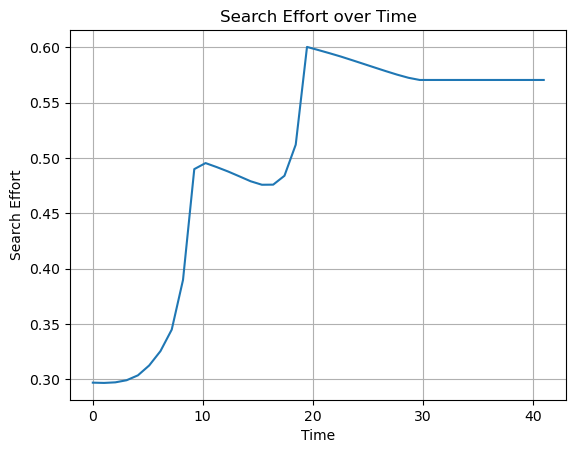

In [371]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


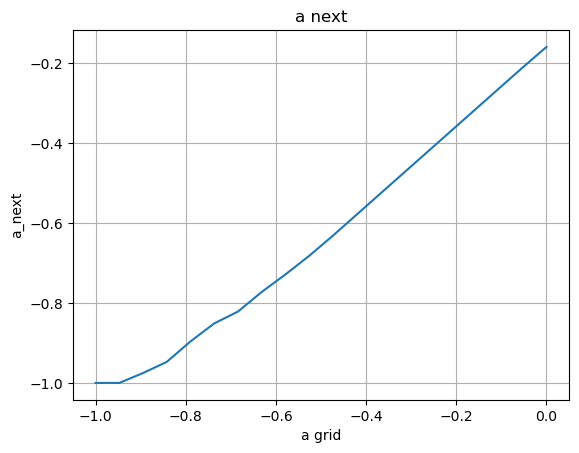

In [372]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [373]:
model1 = model.copy()
# model1.par.L = -0.00
# model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)
model1.par.euler = False

In [374]:
value_function_employment(model1.par, model1.sol)

In [375]:
solve_search_and_consumption(model1.par, model1.sol)

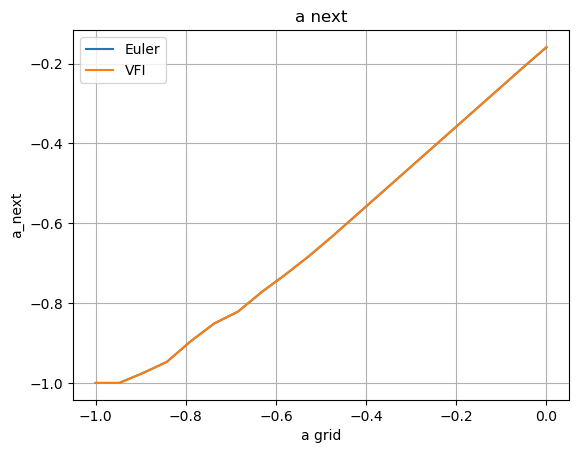

In [376]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next[0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.legend()
plt.grid(True)
plt.show()


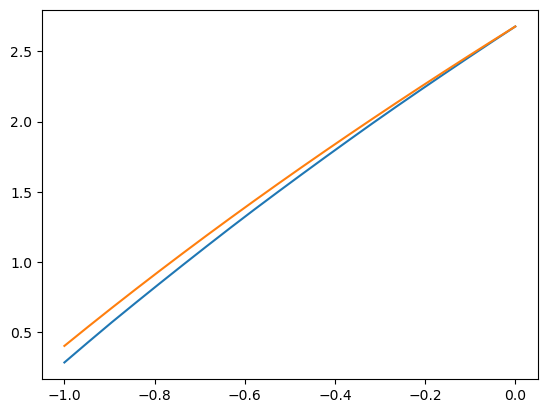

In [377]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(model.par.a_grid, model.par.V_e[-1,0,:])
plt.plot(model.par.a_grid, model1.par.V_e[-1,0,:])

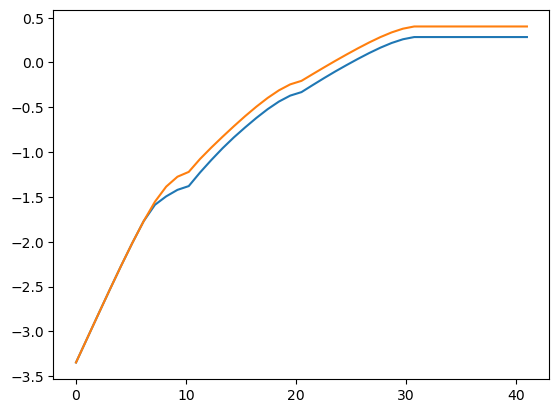

In [378]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[:,0,0])
plt.plot(time, model1.par.V_e[:,0,0])

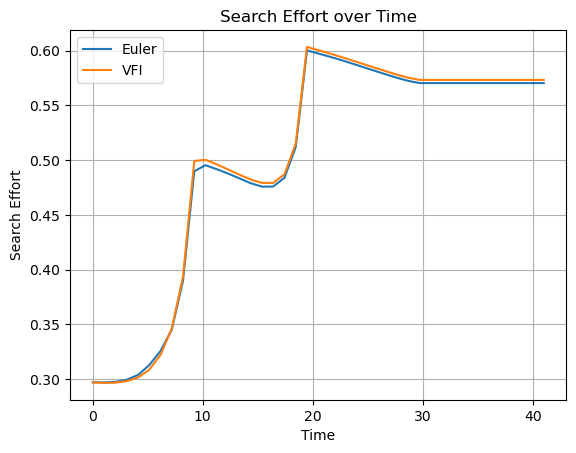

In [379]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='Euler')
plt.plot(time, model1.sol.s[:model1.par.T,0], label='VFI')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [380]:
solve_forward(model.par, model.sol, model.sim)

In [381]:
solve_forward(model1.par, model1.sol, model1.sim)

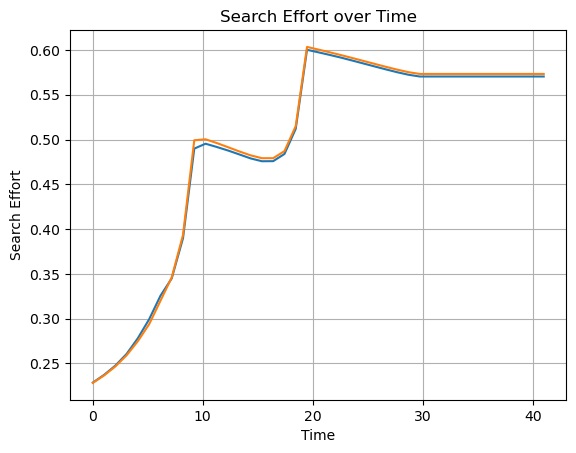

In [382]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T])
plt.plot(time, model1.sim.s[:model.par.T])

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


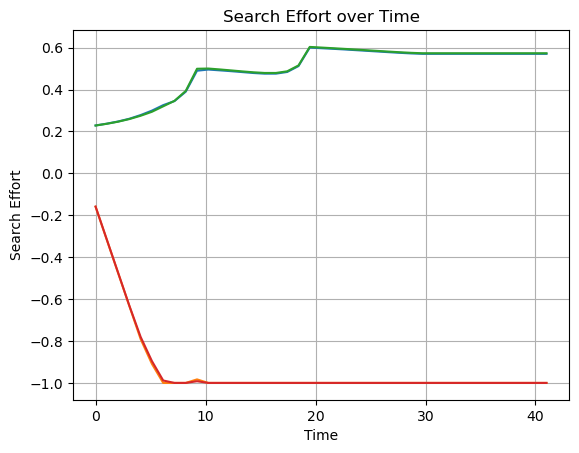

In [383]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s)
plt.plot(time, model.sim.a_next)
plt.plot(time, model1.sim.s)
plt.plot(time, model1.sim.a_next)

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()

In [384]:
solve_forward_employment(model.par, model.sol, model.sim)

In [385]:
solve_forward_employment(model1.par, model1.sol, model1.sim)

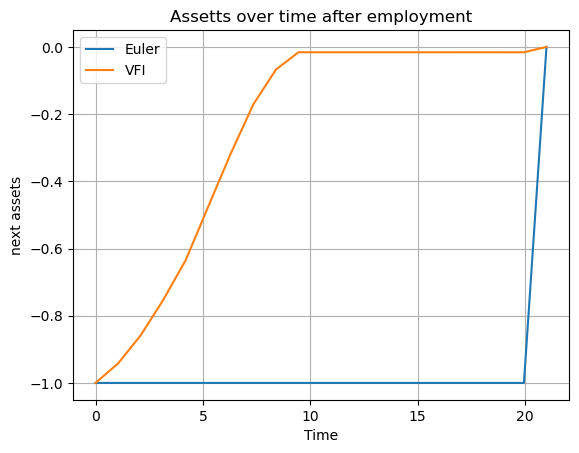

In [386]:
time = np.linspace(0, model.par.N+model.par.M+1, model.par.N+model.par.M+1)
plt.plot(time, model.sim.a_e[-1,:], label='Euler')
plt.plot(time, model1.sim.a_e[-1,:], label='VFI')



plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.legend()
plt.show()